In [22]:
# Import necessary libraries
import pandas as pd
from transformers import T5Tokenizer, T5ForConditionalGeneration
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Step 1: Load the dataset
data = pd.read_csv('dataset.csv')

In [28]:
# Step 2: Keep relevant columns
# We only need 'app_name', 'review_text', and 'review_score' columns
data = data[['app_name', 'review_text', 'review_score']]

In [32]:
# Step 3: Preprocess the text data (cleaning can vary based on your needs)
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = text.strip()  # Remove leading/trailing spaces
    else:
        text = ""  # Handle non-string values (e.g., NaN) by setting to empty string
    return text

data['cleaned_review_text'] = data['review_text'].apply(preprocess_text)

In [34]:
# Step 4: Load the FlanT5 model for sentiment classification
tokenizer = T5Tokenizer.from_pretrained('google/flan-t5-small')
model = T5ForConditionalGeneration.from_pretrained('google/flan-t5-small')

# Function to classify sentiment using the FlanT5 model
def classify_sentiment(review):
    # Prepare the input text for sentiment analysis
    input_text = f"Classify the sentiment of this review: {review}"
    
    # Tokenize the input text
    inputs = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)
    
    # Generate prediction
    outputs = model.generate(inputs.input_ids)
    
    # Decode the predicted sentiment label
    sentiment = tokenizer.decode(outputs[0], skip_special_tokens=True)
    
    return sentiment

Enter the name of the game:  Killing Floor


C:\Users\LENOVO\anaconda3\Lib\site-packages\transformers\generation\utils.py:1220: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6392\1758927019.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sentiment'] = filtered_data['cleaned_review_text'].apply(classify_sentiment)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6392\1758927019.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot

Sentiment counts for 'Killing Floor':
 sentiment
positive    173
negative     22
Name: count, dtype: int64


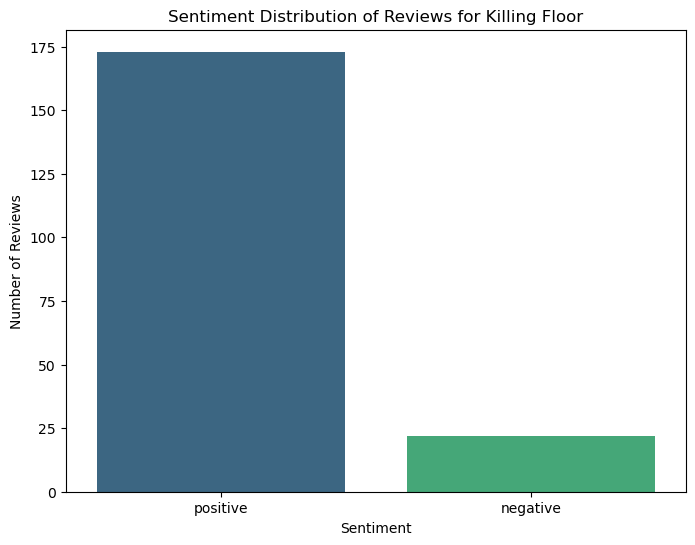

In [36]:
# Step 5: User input for game name
game_name = input("Enter the name of the game: ")

# Filter the data to get reviews for the input game name
filtered_data = data[data['app_name'].str.contains(game_name, case=False, na=False)]

if filtered_data.empty:
    print(f"No reviews found for the game '{game_name}'")
else:
    # Step 6: Apply sentiment classification to the filtered reviews
    filtered_data['sentiment'] = filtered_data['cleaned_review_text'].apply(classify_sentiment)
    
    # Statistical analysis of the sentiment distribution

    # Count the number of reviews in each sentiment category
    sentiment_count = filtered_data['sentiment'].value_counts()

    # Print the sentiment counts
    print(f"Sentiment counts for '{game_name}':\n", sentiment_count)

    # Plot the sentiment distribution
    plt.figure(figsize=(8, 6))
    sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='viridis')
    plt.title(f'Sentiment Distribution of Reviews for {game_name}')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Reviews')
    plt.show()

In [38]:
import joblib

# Save the model and tokenizer
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(tokenizer, 'tokenizer.pkl')

['tokenizer.pkl']